## Data Preperation

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('seaborn')

In [29]:
X = pd.read_csv('/content/Linear_X_Train.csv').values
y = pd.read_csv('/content/Linear_X_Train.csv').values
print(X.shape, y.shape)

(3750, 1) (3750, 1)


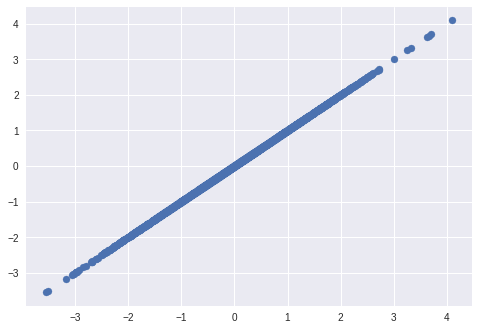

In [30]:
plt.scatter(X,y)
plt.show()

## Linear Regression

In [31]:
def hypothesis(x,theta):
  ycap = theta[0] + theta[1]*x
  return ycap

In [32]:
def error(X,y,theta):
  m = X.shape[0]
  total_error = 0
  for i in range(m):
    ycap = hypothesis(X[i],theta)
    total_error += (ycap-y[i])**2
  return total_error/m

In [33]:
def gradient(X,y,theta):
  m = X.shape[0]
  grad = np.zeros((2,))
  for i in range(m):
    x = X[i]
    ycap = hypothesis(x,theta)
    grad[0] += (ycap-y[i])
    grad[1] += (ycap-y[i])*X[i]

  return grad/m 

In [34]:
def gradientDescent(X,y,iter=1000,learning_rate=0.1):
  theta = np.zeros((2,))
  for i in range(iter):
    grad = gradient(X,y,theta)
    theta[0] -= learning_rate*grad[0]
    theta[1] -= learning_rate*grad[1]
    print(error(X,y,theta))
  return theta

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.33, random_state=54)

In [ ]:
theta = gradientDescent(X_train,Y_train)

In [37]:
print(theta)

[-4.16667064e-17  1.00000000e+00]


In [38]:
xTest = pd.read_csv('/content/Linear_X_Test.csv').values

In [39]:
ypred = []
for i in range(X_test.shape[0]):
  ypred.append(hypothesis(X_test[i],theta))

Y_pred = np.array(ypred)

In [40]:
def r2Score(y,Y_pred):
  num = np.sum((y-Y_pred)**2)
  dem = np.sum((y-Y_pred.mean())**2)
  score = 1-(num/dem)
  return score*100

In [41]:
print(r2Score(Y_test,Y_pred))

100.0
